In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [167]:
df = pd.read_csv(r'E:\Data Analysis\Zomato Data/zomato.csv')

In [168]:
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                             phone  \
0          Yes        Yes  4.1/5    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5    787                      080 41714161   
2          Yes         No  3.8/5    918                    +91 9663487993   
3           No         No  3.7/5     88                    +91 9620009302   
4           No         No  3.8/5    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [169]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [170]:
df.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [171]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [172]:
# Data cleaning find percent of missing values in your data deal with missing values


In [173]:
#to extract the columns which have null values
feature_na = [feature for feature in df.columns if df[feature].isnull().sum()> 0] 

In [174]:
feature_na

['rate',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)']

In [175]:
# percent of missing value
for feature in feature_na:
    print('{} has {} missing value'.format(feature,np.round(df[feature].isnull().sum()/len(df)*100,4)))

rate has 15.0337 missing value
phone has 2.3358 missing value
location has 0.0406 missing value
rest_type has 0.4389 missing value
dish_liked has 54.2916 missing value
cuisines has 0.087 missing value
approx_cost(for two people) has 0.669 missing value


In [176]:
df.shape

(51717, 17)

In [177]:
# calculate Average rating of each restaurant
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [178]:
df.dropna(axis = 'index', subset=['rate'], inplace = True)

In [179]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [180]:
df['rate'].dtype

dtype('O')

In [181]:
def split(x):
    return x.split('/')[0]
df['rate'] = df['rate'].apply(split)

In [182]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2',
       '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ',
       '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ',
       '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ',
       '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [183]:
df.replace('NEW',0, inplace = True)
df.replace('-',0, inplace = True)

In [184]:
df['rate'] = df['rate'].astype(float)

In [185]:
df['rate'].dtype

dtype('float64')

In [186]:
df['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 0. , 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

<AxesSubplot:xlabel='name'>

D:\Anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 131 (\x83) missing from current font.

D:\Anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 130 (\x82) missing from current font.



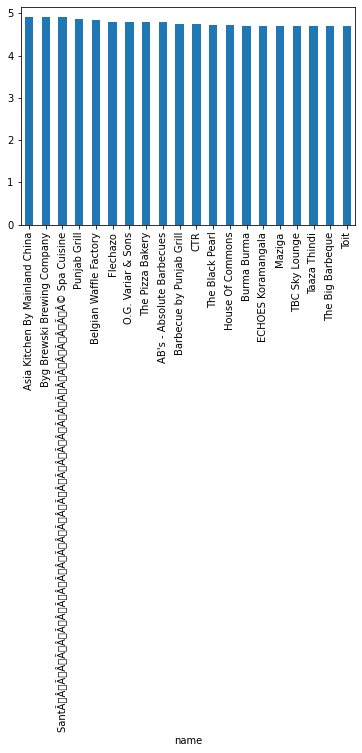

In [187]:
df.groupby('name')['rate'].mean().nlargest(20).plot.bar()

In [188]:
df_rate = df.groupby('name')['rate'].mean().to_frame().reset_index().rename(columns= {'name':'restaurant','rate':'average rating'})

In [189]:
df_rate.head(10)

restaurant  average rating
0                          #FeelTheROLL           3.400
1                            #L-81 Cafe           3.900
2                               #refuel           3.700
3                              1000 B.C           3.200
4  100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C           3.700
5            11 to 11 Express Biriyanis           3.500
6                    1131 Bar + Kitchen           4.500
7             12th Main - Grand Mercure           4.100
8                         1441 Pizzeria           4.100
9                        1522 - The Pub           4.212

In [190]:
df_rate.shape

(7162, 2)

In [191]:
# Get distribution of rating column and find distribution type

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='average rating', ylabel='Density'>

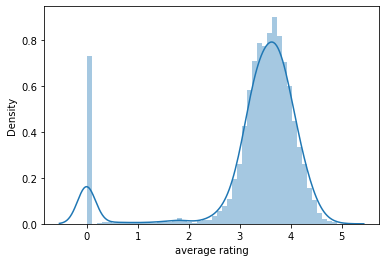

In [192]:
sns.distplot(df_rate['average rating'])

In [193]:
# 
chains = df['name'].value_counts()[0:20]
chains

Cafe Coffee Day        89
Onesta                 85
Empire Restaurant      71
Just Bake              68
Five Star Chicken      68
Kanti Sweets           68
Petoo                  64
Baskin Robbins         63
Pizza Hut              62
Polar Bear             61
Sweet Truth            60
Domino's Pizza         60
KFC                    60
Beijing Bites          60
McDonald's             59
Smoor                  59
Subway                 59
Faasos                 57
Burger King            55
Smally's Resto Cafe    54
Name: name, dtype: int64

In [194]:
chains.dtype

dtype('int64')

Text(0.5, 0, 'Number of outlets')

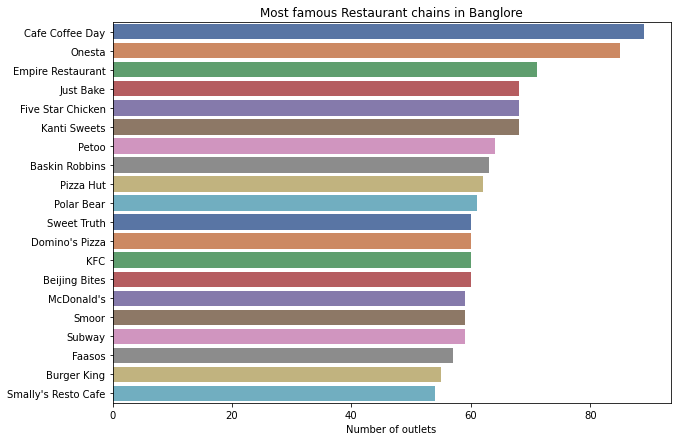

In [195]:
plt.figure(figsize =(10,7))
sns.barplot(x = chains, y = chains.index,palette='deep')
plt.title('Most famous Restaurant chains in Banglore')
plt.xlabel('Number of outlets')

([<matplotlib.patches.Wedge at 0x1434eb52370>,
 [Text(-0.481488774517003, 0.9890240442042423, ''),
  Text(0.5252605823084886, -1.0789352717716423, '')],
 [Text(-0.26263024064563795, 0.5394676604750411, '64.4%'),
  Text(0.30640200634661835, -0.629378908533458, '35.6%')])

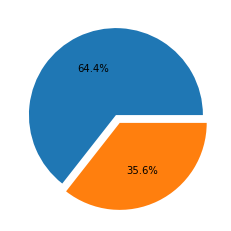

In [196]:
x = df['online_order'].value_counts()

labels = ['accepted', 'not accepted']
plt.pie(x,explode=[0.0,0.1],autopct='%1.1f%%')

In [197]:
import plotly.express as px
labels=['accepted','not accepted']
fig = px.pie(df, values=x, names=labels,title='Pie chart')
fig.show()

In [198]:
#What is the ratio b/w restaurants that provide and do not provide table booking ?
y = df['book_table'].value_counts()
Labels = [' not book', 'book']
import plotly.graph_objs as go
from plotly.offline import iplot


In [199]:
trace = go.Pie(labels=Labels, values = y, hoverinfo = 'label+percent', textinfo = 'value', textfont=dict(size=25),pull=[0, 0, 0,0.2, 0])
iplot([trace])

([<matplotlib.patches.Wedge at 0x1434ea39a60>,
 [Text(-0.9856961240827233, 0.4882654513359477, ''),
  Text(0.9856961240827234, -0.48826545133594734, '')],
 [Text(-0.537652431317849, 0.26632660981960776, '85.4%'),
  Text(0.5376524313178491, -0.2663266098196076, '14.6%')])

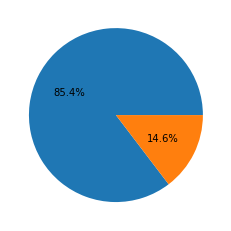

In [200]:
#without plotly
plt.pie(y,autopct='%1.1f%%')

In [201]:
# type of restaurant

In [202]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [203]:
df.dropna(axis = 'index', subset=['rest_type'], inplace = True)

In [204]:
len(df['rest_type'].unique())

87

In [205]:
trace1 = go.Bar(x=df['rest_type'].value_counts().nlargest(20).index, y = df['rest_type'].value_counts())

In [206]:
iplot([trace1])

In [207]:
# Highest voted Restaurant

<AxesSubplot:xlabel='name'>

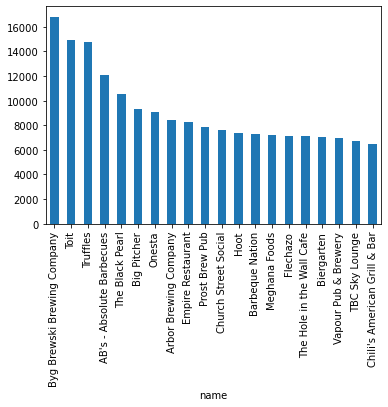

In [208]:
df.groupby('name')['votes'].max().nlargest(20).plot.bar()

In [209]:
# with plotly
trace2 = go.Bar(x=df.groupby('name')['votes'].sum().nlargest(20).index,
               y=df.groupby('name')['votes'].sum().nlargest(20))

In [210]:
iplot([trace2])

In [211]:
# Total Restaurant at different location of Banglore

In [212]:
df.groupby('location')['name'].unique()

location
BTM                  [Sankranthi Veg Restaurant, Hearts Unlock Cafe...
Banashankari         [Jalsa, Spice Elephant, San Churro Cafe, Addhu...
Banaswadi            [Cafe Nibras, The Sanctuary, Crunch Pizzas, Pi...
Bannerghatta Road    [Deja Vu Resto Bar, Fattoush, Empire Restauran...
Basavanagudi         [Grand Village, Timepass Dinner, Srinathji's C...
                                           ...                        
West Bangalore       [FreshMenu, Fit Dish Fetish, Garden City Mobil...
Whitefield           [Imperio Cafe, Night Diaries, LocalHost, AB's ...
Wilson Garden        [Tree Top, Sahana's (Nati Style), Karavali Kol...
Yelahanka            [Prashanth Naati Corner, Cheta's Kitchen, Twis...
Yeshwantpur          [Chef's Bank, New Agarwal Bhavan, Fishing Boat...
Name: name, Length: 92, dtype: object

In [213]:
restaurant = []
location = []
for key, location_df in df.groupby('location'):
    location.append(key)
    restaurant.append(len(location_df['name'].unique()))

In [214]:
df_total= pd.DataFrame(zip(location,restaurant))
df_total.head()

0    1
0                BTM  578
1       Banashankari  238
2          Banaswadi  150
3  Bannerghatta Road  361
4       Basavanagudi  195

In [215]:
df_total.columns = ['locations', 'total restaurant']

In [216]:
df_total.set_index('locations', inplace = True)

<AxesSubplot:xlabel='locations'>

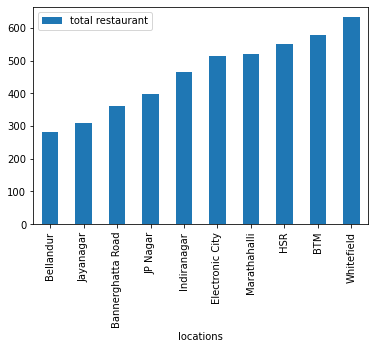

In [217]:
df_total.sort_values(by ='total restaurant').tail(10).plot.bar()

In [218]:
 #Total number of variety of restaurants in Banglore

In [219]:
cuisines = df['cuisines'].value_counts()[0:10]

In [220]:

trace3 = go.Bar(x =cuisines.index, y = cuisines)


In [221]:
iplot([trace3])


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'North Indian'),
  Text(1, 0, 'North Indian, Chinese'),
  Text(2, 0, 'South Indian'),
  Text(3, 0, 'Cafe'),
  Text(4, 0, 'Bakery, Desserts'),
  Text(5, 0, 'Biryani'),
  Text(6, 0, 'South Indian, North Indian, Chinese'),
  Text(7, 0, 'Fast Food'),
  Text(8, 0, 'Desserts'),
  Text(9, 0, 'Chinese')])

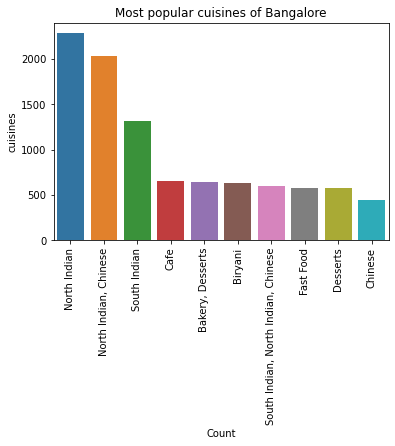

In [222]:
# using seaborn
sns.barplot(x = cuisines.index, y = cuisines)
plt.xlabel('Count')
plt.title("Most popular cuisines of Bangalore")
plt.xticks(rotation = 'vertical')

In [223]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [224]:
df['approx_cost(for two people)'].isna().sum()

250

In [225]:
df.dropna(axis = 'index', subset =['approx_cost(for two people)'],inplace = True)

In [226]:
df['approx_cost(for two people)'].isna().sum()

0

In [227]:
df['approx_cost(for two people)'].dtype

dtype('O')

In [228]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', '2,200', '2,000',
       '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800',
       '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600',
       '1,450', '70', '3,200', '560', '240', '360', '6,000', '1,050',
       '2,300', '4,100', '120', '5,000', '3,700', '1,650', '2,700',
       '4,500'], dtype=object)

In [229]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].apply(lambda x: x.replace(',', ''))

In [230]:
df['approx_cost(for two people)'].dtype

dtype('O')

In [231]:
# alternate method
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [232]:
df[df['approx_cost(for two people)'].apply(is_float)]

url  \
0      https://www.zomato.com/bangalore/jalsa-banasha...   
1      https://www.zomato.com/bangalore/spice-elephan...   
2      https://www.zomato.com/SanchurroBangalore?cont...   
3      https://www.zomato.com/bangalore/addhuri-udupi...   
4      https://www.zomato.com/bangalore/grand-village...   
...                                                  ...   
51709  https://www.zomato.com/bangalore/the-farm-hous...   
51711  https://www.zomato.com/bangalore/bhagini-2-whi...   
51712  https://www.zomato.com/bangalore/best-brews-fo...   
51715  https://www.zomato.com/bangalore/chime-sherato...   
51716  https://www.zomato.com/bangalore/the-nest-the-...   

                                                 address  \
0      942, 21st Main Road, 2nd Stage, Banashankari, ...   
1      2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...   
2      1112, Next to KIMS Medical College, 17th Cross...   
3      1st Floor, Annakuteera, 3rd Stage, Banashankar...   
4      10, 3rd Floor, Lakshmi Associates, Gandhi Baza...   
...                                                  ...   
51709  136, SAP Labs India, KIADB Export Promotion In...   
51711  139/C1, Next To GR Tech Park, Pattandur Agraha...   
51712  Four Points by Sheraton Bengaluru, 43/3, White...   
51715  Sheraton Grand Bengaluru Whitefield Hotel & Co...   
51716  ITPL Main Road, KIADB Export Promotion Industr...   

                                                    name online_order  \
0                                                  Jalsa          Yes   
1                                         Spice Elephant          Yes   
2                                        San Churro Cafe          Yes   
3                                  Addhuri Udupi Bhojana           No   
4                                          Grand Village           No   
...                                                  ...          ...   
51709                         The Farm House Bar n Grill           No   
51711                                            Bhagini           No   
51712  Best Brews - Four Points by Sheraton Bengaluru...           No   
51715  Chime - Sheraton Grand Bengaluru Whitefield Ho...           No   
51716                       The Nest - The Den Bengaluru           No   

      book_table  rate  votes                             phone  \
0            Yes   4.1    775    080 42297555\r\n+91 9743772233   
1             No   4.1    787                      080 41714161   
2             No   3.8    918                    +91 9663487993   
3             No   3.7     88                    +91 9620009302   
4             No   3.8    166  +91 8026612447\r\n+91 9901210005   
...          ...   ...    ...                               ...   
51709         No   3.7     34    +91 9980121279\n+91 9900240646   
51711         No   2.5     81                      080 65951222   
51712         No   3.6     27                      080 40301477   
51715        Yes   4.3    236                      080 49652769   
51716         No   3.4     13                    +91 8071117272   

                         location            rest_type  \
0                    Banashankari        Casual Dining   
1                    Banashankari        Casual Dining   
2                    Banashankari  Cafe, Casual Dining   
3                    Banashankari          Quick Bites   
4                    Basavanagudi        Casual Dining   
...                           ...                  ...   
51709                  Whitefield   Casual Dining, Bar   
51711                  Whitefield   Casual Dining, Bar   
51712                  Whitefield                  Bar   
51715  ITPL Main Road, Whitefield                  Bar   
51716  ITPL Main Road, Whitefield   Bar, Casual Dining   

                                              dish_liked  \
0      Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1      Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2      Churros, Cannelloni, Minestrone Soup, Hot Cho

In [233]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(int)

In [234]:
df['approx_cost(for two people)'].dtype

dtype('int32')

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='approx_cost(for two people)', ylabel='Density'>

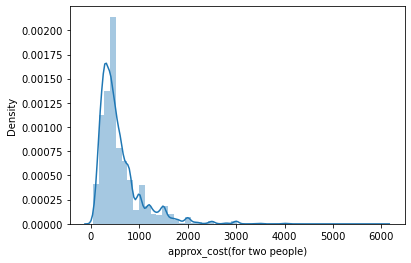

In [235]:
sns.distplot(df['approx_cost(for two people)'])

<AxesSubplot:xlabel='rate', ylabel='approx_cost(for two people)'>

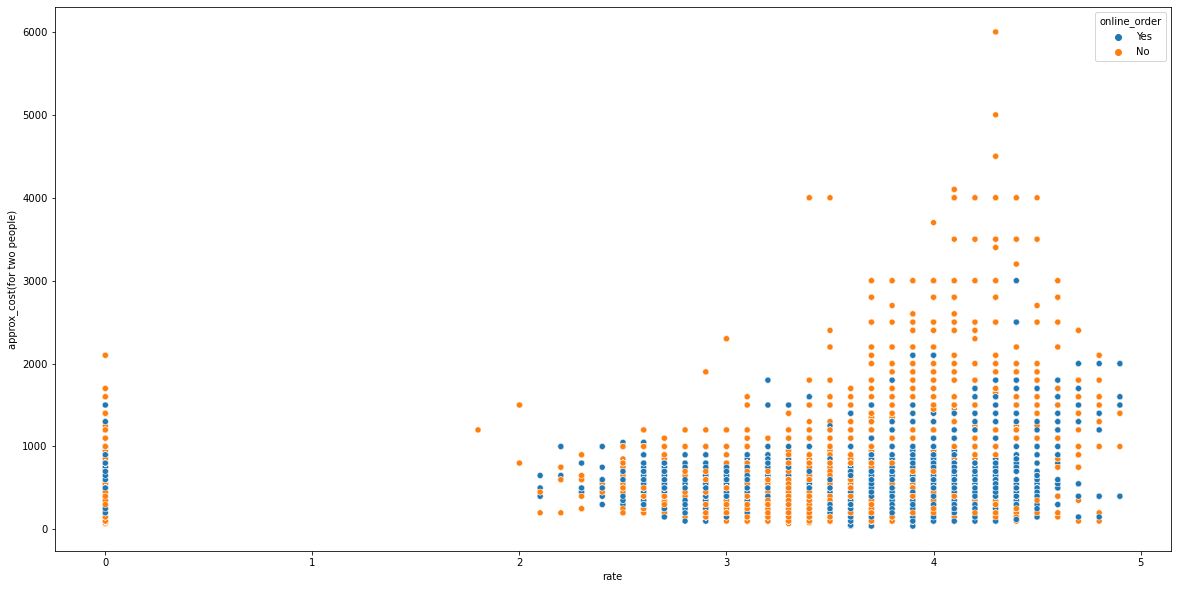

In [236]:
plt.figure(figsize =(20,10))
sns.scatterplot(x ='rate', y ='approx_cost(for two people)',hue = 'online_order', data =df)

<AxesSubplot:xlabel='online_order', ylabel='votes'>

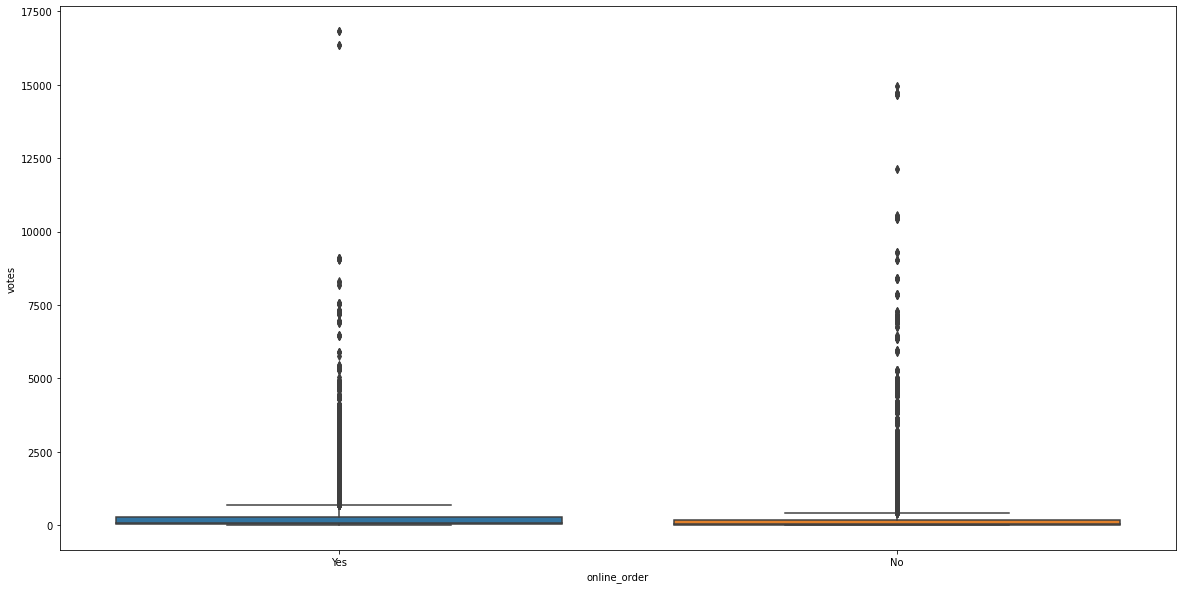

In [237]:
plt.figure(figsize =(20,10))
sns.boxplot(x ='online_order', y = 'votes',data =df)

In [238]:
import plotly.express as px
px.box(df, x ='online_order', y= 'votes')

<AxesSubplot:xlabel='online_order', ylabel='approx_cost(for two people)'>

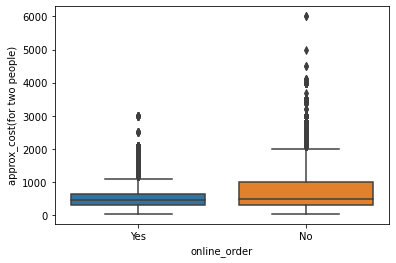

In [239]:
sns.boxplot(x ='online_order', y = 'approx_cost(for two people)',data =df)

In [240]:
px.box(df, x ='online_order', y= 'approx_cost(for two people)')

In [241]:
#Find out most luxurious restaurant of Banglore

In [242]:
#most cheapest price
df['approx_cost(for two people)'].min()


40

In [243]:
#most cheapest restaurant
df[df['approx_cost(for two people)']==40]['name']

5270     Srinidhi Sagar Food Line
12232    Srinidhi Sagar Food Line
14819    Srinidhi Sagar Food Line
17773              Srinidhi Sagar
18891    Srinidhi Sagar Food Line
27091       Srinidhi Sagar Deluxe
29785       Srinidhi Sagar Deluxe
32485              Srinidhi Sagar
Name: name, dtype: object

In [244]:
#highest price
df['approx_cost(for two people)'].max()

6000

In [245]:
# most expansive restaurant
df[df['approx_cost(for two people)']==6000]['name']

19139    Le Cirque Signature - The Leela Palace
45618    Le Cirque Signature - The Leela Palace
Name: name, dtype: object

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='approx_cost(for two people)', ylabel='Density'>

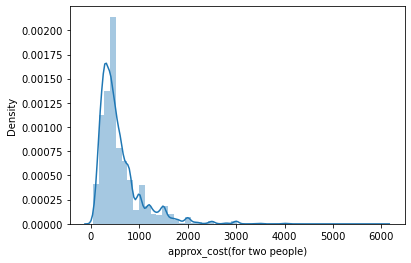

In [246]:
#distribution of approx_cost(for two people)
sns.distplot(df['approx_cost(for two people)'])

In [247]:
Data =df.copy()

<AxesSubplot:>

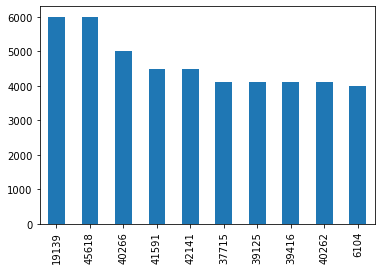

In [248]:
# top 10 expansive restaurant
Data['approx_cost(for two people)'].nlargest(10).plot.bar()

<AxesSubplot:>

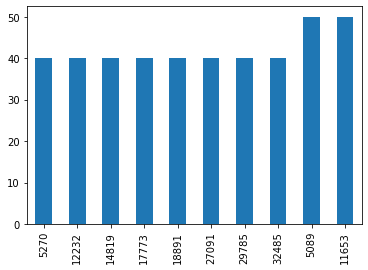

In [249]:
#top 10 cheapest restaurant
Data['approx_cost(for two people)'].nsmallest(10).plot.bar()

In [250]:
Max = Data['approx_cost(for two people)'].nlargest(10)

<AxesSubplot:ylabel='approx_cost(for two people)'>

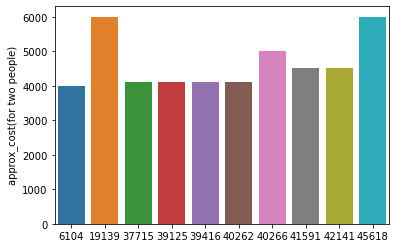

In [251]:
sns.barplot(x = Max.index, y = Max)

<AxesSubplot:ylabel='approx_cost(for two people)'>

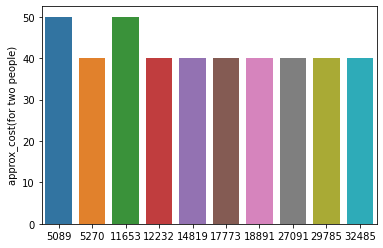

In [252]:
sns.barplot(x = Data['approx_cost(for two people)'].nsmallest(10).index, y =Data['approx_cost(for two people)'].nsmallest(10) )

In [253]:
px.histogram(df, x="approx_cost(for two people)")

In [254]:
df[df['approx_cost(for two people)']==6000].loc[:,('name','cuisines','dish_liked')]

name         cuisines  \
19139  Le Cirque Signature - The Leela Palace  French, Italian   
45618  Le Cirque Signature - The Leela Palace  French, Italian   

                                              dish_liked  
19139  Wine, Asparagus Soup, Creme Brulee, Pasta, Rav...  
45618  Wine, Asparagus Soup, Creme Brulee, Pasta, Rav...

In [255]:
df[df['approx_cost(for two people)']==40].loc[:,('name','cuisines','dish_liked')]

name                             cuisines  \
5270   Srinidhi Sagar Food Line  South Indian, North Indian, Chinese   
12232  Srinidhi Sagar Food Line  South Indian, North Indian, Chinese   
14819  Srinidhi Sagar Food Line  South Indian, North Indian, Chinese   
17773            Srinidhi Sagar  South Indian, North Indian, Chinese   
18891  Srinidhi Sagar Food Line  South Indian, North Indian, Chinese   
27091     Srinidhi Sagar Deluxe  South Indian, North Indian, Chinese   
29785     Srinidhi Sagar Deluxe  South Indian, North Indian, Chinese   
32485            Srinidhi Sagar  South Indian, North Indian, Chinese   

                                              dish_liked  
5270                    Vada, Masala Dosa, Filter Coffee  
12232                   Vada, Masala Dosa, Filter Coffee  
14819                   Vada, Masala Dosa, Filter Coffee  
17773  Masala Dosa, Rava Dosa, Rava Idli, Filter Coff...  
18891                   Vada, Masala Dosa, Filter Coffee  
27091  Idli, Coffee, Masala Dosa, Fruit Juices, Vada,...  
29785  Idli, Coffee, Masala Dosa, Fruit Juices, Vada,...  
32485  Masala Dosa, Rava Dosa, Rava Idli, Filter Coff...

In [256]:
Data.set_index('location', inplace = True)
df_budget = Data[Data['approx_cost(for two people)']<=500].loc[:,'approx_cost(for two people)']

In [257]:
df_budget.head()

location
Banashankari    300
Banashankari    500
Banashankari    500
Banashankari    450
Banashankari    300
Name: approx_cost(for two people), dtype: int32

In [258]:
df_budget=df_budget.reset_index()

In [259]:
df_budget.head()

location  approx_cost(for two people)
0  Banashankari                          300
1  Banashankari                          500
2  Banashankari                          500
3  Banashankari                          450
4  Banashankari                          300

<AxesSubplot:>

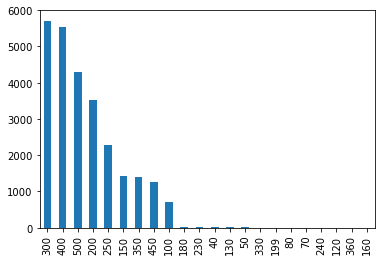

In [260]:
df_budget['approx_cost(for two people)'].value_counts().plot.bar()

In [261]:
df.dtypes

url                             object
address                         object
name                            object
online_order                    object
book_table                      object
rate                           float64
votes                            int64
phone                           object
location                        object
rest_type                       object
dish_liked                      object
cuisines                        object
approx_cost(for two people)      int32
reviews_list                    object
menu_item                       object
listed_in(type)                 object
listed_in(city)                 object
dtype: object

In [262]:
# Total restaurant  that have rating >4 & that are budget too
df[(df['rate']>=4) & (df['approx_cost(for two people)']<=500)].shape

(4001, 17)

In [263]:
len(df[(df['rate']>=4) & (df['approx_cost(for two people)']<=500)])

4001

In [264]:
df_new = df[(df['rate']>=4) & (df['approx_cost(for two people)']<=500)]

In [265]:
df_new.head()

url  \
10  https://www.zomato.com/bangalore/caf%C3%A9-dow...   
12  https://www.zomato.com/bangalore/the-coffee-sh...   
13  https://www.zomato.com/bangalore/caf-eleven-ba...   
34  https://www.zomato.com/bangalore/faasos-banash...   
39  https://www.zomato.com/bangalore/maruthi-davan...   

                                              address  \
10  12,29 Near PES University Back Gate, D'Souza N...   
12      6th Block, 3rd Stage, Banashankari, Bangalore   
13  111, Sapphire Toys Building, 100 Feet Ring Roa...   
34  80, BDA Complex, 2nd Stage, Banashankari, Bang...   
39  556/A, Water Tank Road, 3rd Stage, Banashankar...   

                                                 name online_order book_table  \
10  CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The A...          Yes         No   
12                                   The Coffee Shack          Yes        Yes   
13                                         Caf-Eleven           No         No   
34                                             Faasos          Yes         No   
39                       Maruthi Davangere Benne Dosa          Yes         No   

    rate  votes                           phone      location    rest_type  \
10   4.1    402  080 26724489\r\n+91 7406048982  Banashankari         Cafe   
12   4.2    164                  +91 9731644212  Banashankari         Cafe   
13   4.0    424                    080 49577715  Banashankari         Cafe   
34   4.2    415                  +91 7700020020  Banashankari  Quick Bites   
39   4.0     17                  +91 9019563485  Banashankari  Quick Bites   

                                           dish_liked  \
10  Waffles, Pasta, Crispy Chicken, Honey Chilli C...   
12  Coffee, Spaghetti, Pancakes, Nachos, Pasta, Sa...   
13  Sandwich, Omelette, Ice Tea, Virgin Mojito, Ho...   
34  Rolls, Veggie Wrap, Chocolate Fantasy, Rice Bo...   
39                                                NaN   

                               cuisines  approx_cost(for two people)  \
10                                 Cafe                          500   
12  Cafe, Chinese, Continental, Italian                          500   
13                    Cafe, Continental                          450   
34     North Indian, Biryani, Fast Food                          500   
39                         South Indian                          150   

                                         reviews_list  \
10  [('Rated 4.0', 'RATED\n  We ended up here on a...   
12  [('Rated 4.0', "RATED\n  Food - 4/5\nAmbience ...   
13  [('Rated 2.0', "RATED\n  This is a hookah cafe...   
34  [('Rated 3.0', 'RATED\n  Not worth for the mon...   
39  [('Rated 5.0', "RATED\n  This restaurant serve...   

                                            menu_item listed_in(type)  \
10                                                 []           Cafes   
12                                                 []           Cafes   
13                                                 []           Cafes   
34  ['Chole Kulcha Meal', 'Upvas Aloo Paratha With...        Delivery   
39  ['Benne Dosa', 'Benne Masala Dosa', 'Benne Kal...        Delivery   

   listed_in(city)  
10    Banashankari  
12    Banashankari  
13    Banashankari  
34    Banashankari  
39    Banashankari

In [266]:
df_new.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [267]:
location = []
total =[]
for loc,location_df in df_new.groupby('location'):
    location.append(loc)
    total.append(len(location_df['name'].unique()))

In [268]:
Location_df = pd.DataFrame(zip(location,total))

In [269]:
Location_df.columns = ['location', 'total restaurant']

In [270]:
Location_df.set_index('location', inplace = True)

Text(0, 0.5, 'Total restaurants')

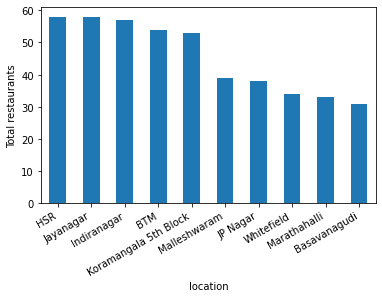

In [271]:
Location_df['total restaurant'].nlargest(10).plot.bar()
plt.gcf().autofmt_xdate()
plt.ylabel('Total restaurants')

In [272]:
trace4 = go.Bar( 
        x = Location_df['total restaurant'].nlargest(10).index,
        y = Location_df['total restaurant'].nlargest(10),
        name= 'Priority')
iplot([trace4])

In [273]:
#To Visualise what are the names of those hotels
locations=[]
Total=[]
for loc,location_df in df_new.groupby('location'):
    locations.append(loc)
    Total.append(location_df['name'].unique())
    

In [274]:
afford=pd.DataFrame(zip(locations,Total))
afford.columns=['location','res_names']
afford.set_index('location',inplace=True)
afford.head()

res_names
location                                                            
BTM                [eat.fit, Hiyar Majhe Kolkata, XO Belgian Waff...
Banashankari       [CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The ...
Banaswadi          [Pooja Dosa Camp, Corner House Ice Cream, The ...
Bannerghatta Road  [BOX8- Desi Meals, Krishna Kuteera, Krishna Ku...
Basavanagudi       [Kabab Magic, Sri Guru Kottureshwara Davangere...

In [275]:
def return_budget(location,restaurant_type):
    budget = df[(df['approx_cost(for two people)']<=400) & (df['location']==location) & 
                     (df['rate']>4) & (df['rest_type']==restaurant_type)]
    return (budget['name'].unique())

In [276]:
return_budget('BTM',"Quick Bites")

array(['Swadista Aahar', 'Litti Twist', 'The Shawarma Shop', 'Gorbandh',
       'Yum In My Tum', 'Chaatimes', "Muthashy's", 'Swad Punjab Da',
       "Domino's Pizza", 'Roti Wala', 'Andhra Kitchen'], dtype=object)

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='location'>

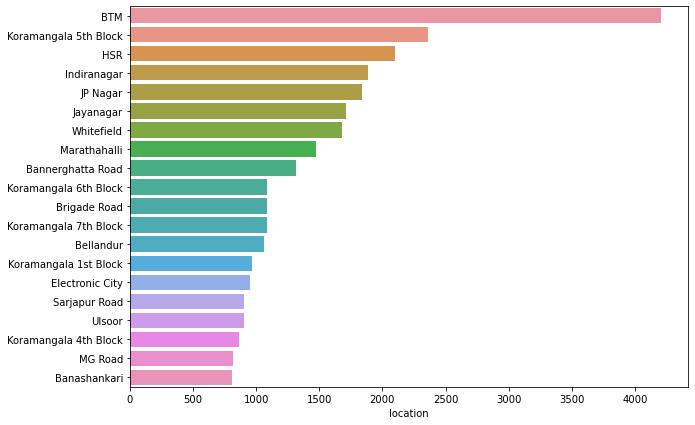

In [277]:
#which are foodie area
plt.figure(figsize=(10,7))
Restaurant_locations=df['location'].value_counts()[:20]
sns.barplot(Restaurant_locations,Restaurant_locations.index)

In [278]:
#using plotly
Restaurant_locations=df['location'].value_counts()[:20]
trace5 = go.Bar( 
        x = Restaurant_locations.index,
        y = Restaurant_locations,
        name= 'Priority')
iplot([trace5])

In [279]:
#Find lattitudes and longitudes for each of the location of Banglore
Locations = pd.DataFrame({'Name':df['location'].unique()})

In [280]:
Locations.head()

Name
0        Banashankari
1        Basavanagudi
2         Mysore Road
3           Jayanagar
4  Kumaraswamy Layout

In [281]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [282]:
from geopy.geocoders import Nominatim

In [283]:
lat_lon = []
geolocator = Nominatim(user_agent = 'app')
for location in Locations['Name']:
    location = geolocator.geocode(location)
    if location is None:
        lat_lon.append(np.nan)
    else:
        geo = (location.latitude, location.longitude)
        lat_lon.append(geo)

In [284]:
Locations['geo_loc'] = lat_lon

In [285]:
Locations.head()

Name                           geo_loc
0        Banashankari          (15.8876779, 75.7046777)
1        Basavanagudi          (12.9417261, 77.5755021)
2         Mysore Road          (12.9467026, 77.5300705)
3           Jayanagar  (27.64392675, 83.05280519687284)
4  Kumaraswamy Layout          (12.9081487, 77.5553179)

In [286]:
Rest_locations= pd.DataFrame(df['location'].value_counts().reset_index())

In [287]:
Rest_locations.columns = ['Name','Counts']

In [288]:
Rest_locations.head()

Name  Counts
0                    BTM    4210
1  Koramangala 5th Block    2358
2                    HSR    2102
3            Indiranagar    1889
4               JP Nagar    1842

In [289]:
Restaurant_loc = Rest_locations.merge(Locations, on = 'Name',how ='left').dropna()

In [290]:
Restaurant_loc

Name  Counts                             geo_loc
0                     BTM    4210  (45.95485055, -112.49659530324134)
1   Koramangala 5th Block    2358            (12.9348429, 77.6189768)
2                     HSR    2102                (18.1475, 41.538889)
3             Indiranagar    1889            (12.9732913, 77.6404672)
4                JP Nagar    1842            (12.2655944, 76.6465404)
..                    ...     ...                                 ...
87         West Bangalore       5            (12.9848519, 77.5400626)
88              Yelahanka       4            (13.1006982, 77.5963454)
89   Rajarajeshwari Nagar       2            (12.9274413, 77.5155224)
90             Nagarbhavi       1    (12.95961755, 77.51126721318181)
91                 Peenya       1            (13.0329419, 77.5273253)

[91 rows x 3 columns]

In [291]:
lat,lon = zip(*np.array(Restaurant_loc['geo_loc']))

In [292]:
Restaurant_loc['lat'] = lat
Restaurant_loc['lon'] = lon

In [293]:
Restaurant_loc.head()

Name  Counts                             geo_loc  \
0                    BTM    4210  (45.95485055, -112.49659530324134)   
1  Koramangala 5th Block    2358            (12.9348429, 77.6189768)   
2                    HSR    2102                (18.1475, 41.538889)   
3            Indiranagar    1889            (12.9732913, 77.6404672)   
4               JP Nagar    1842            (12.2655944, 76.6465404)   

         lat         lon  
0  45.954851 -112.496595  
1  12.934843   77.618977  
2  18.147500   41.538889  
3  12.973291   77.640467  
4  12.265594   76.646540

In [294]:
Restaurant_loc.drop('geo_loc',axis = 1, inplace = True)

In [295]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [296]:
import folium
from folium.plugins import HeatMap


In [297]:
def generatebasemap(default_location =[12.97,77.59],default_zoom_start =12):
    basemap = folium.Map(location = default_location, zoom_start = default_zoom_start)
    return basemap

In [298]:
basemap = generatebasemap()

In [299]:
basemap

HeatMap(Restaurant_loc[['lat','lon', 'count']].value.tolist(),zoom =20,radius =15).add_to(basemap)

In [300]:
HeatMap(Restaurant_loc[['lat','lon', 'Counts']].values.tolist(),zoom =20,radius =15).add_to(basemap)


In [301]:
basemap

In [302]:
df2= df[df['cuisines']=='North Indian']
df2.head()

url  \
5   https://www.zomato.com/bangalore/timepass-dinn...   
50  https://www.zomato.com/bangalore/petoo-banasha...   
72  https://www.zomato.com/bangalore/spicy-tandoor...   
87  https://www.zomato.com/bangalore/krishna-sagar...   
94  https://www.zomato.com/bangalore/nandhini-delu...   

                                              address             name  \
5   37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...  Timepass Dinner   
50  276, Ground Floor, 100 Feet Outer Ring Road, B...            Petoo   
72  Opposite ICICi Bank, Hanuman Nagar, Banashanka...    Spicy Tandoor   
87  38, 22nd Main, 22nd Cross, Opposite BDA, 2nd S...    Krishna Sagar   
94  304, Opposite Apollo Public School, 100 Feet R...  Nandhini Deluxe   

   online_order book_table  rate  votes                             phone  \
5           Yes         No   3.8    286  +91 9980040002\r\n+91 9980063005   
50           No         No   3.7     21                    +91 8026893211   
72           No         No   0.0      0                    +91 8050884222   
87           No         No   3.5     31  +91 8892752997\r\n+91 7204780429   
94           No         No   2.6    283      080 26890011\r\n080 26890033   

        location      rest_type  \
5   Basavanagudi  Casual Dining   
50  Banashankari    Quick Bites   
72  Banashankari    Quick Bites   
87  Banashankari    Quick Bites   
94  Banashankari  Casual Dining   

                                           dish_liked      cuisines  \
5   Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...  North Indian   
50                                                NaN  North Indian   
72                                                NaN  North Indian   
87                                                NaN  North Indian   
94  Biryani, Chicken Guntur, Thali, Buttermilk, Ma...  North Indian   

    approx_cost(for two people)  \
5                           600   
50                          450   
72                          150   
87                          200   
94                          600   

                                         reviews_list menu_item  \
5   [('Rated 3.0', 'RATED\n  Food 3/5\nAmbience 3/...        []   
50  [('Rated 2.0', 'RATED\n  This is a neatly made...        []   
72  [('Rated 4.0', 'RATED\n  cost for chicken roll...        []   
87  [('Rated 1.0', 'RATED\n  Worst experience with...        []   
94  [('Rated 3.0', 'RATED\n  Ididnt like much.\n\n...        []   

   listed_in(type) listed_in(city)  
5           Buffet    Banashankari  
50        Delivery    Banashankari  
72        Delivery    Banashankari  
87        Delivery    Banashankari  
94        Delivery    Banashankari

In [303]:
df2.shape

(2244, 17)

In [304]:
north_india = north_india=df2.groupby(['location'],as_index=False)['url'].agg('count')
north_india.columns=['Name','count']
north_india.head()

Name  count
0                BTM    262
1       Banashankari     35
2          Banaswadi      5
3  Bannerghatta Road     60
4       Basavanagudi     17

In [305]:
north_india

Name  count
0                             BTM    262
1                    Banashankari     35
2                       Banaswadi      5
3               Bannerghatta Road     60
4                    Basavanagudi     17
..                            ...    ...
58  Varthur Main Road, Whitefield      3
59                  Vasanth Nagar     12
60                     Whitefield    145
61                  Wilson Garden     37
62                    Yeshwantpur      3

[63 rows x 2 columns]

In [306]:
north_india = north_india.merge(Locations, on = 'Name', how = 'left').dropna()

In [307]:
north_india

Name  count  \
0                             BTM    262   
1                    Banashankari     35   
2                       Banaswadi      5   
3               Bannerghatta Road     60   
4                    Basavanagudi     17   
..                            ...    ...   
58  Varthur Main Road, Whitefield      3   
59                  Vasanth Nagar     12   
60                     Whitefield    145   
61                  Wilson Garden     37   
62                    Yeshwantpur      3   

                                    geo_loc  
0        (45.95485055, -112.49659530324134)  
1                  (15.8876779, 75.7046777)  
2                  (13.0141618, 77.6518539)  
3                   (12.8905219, 77.598149)  
4                  (12.9417261, 77.5755021)  
..                                      ...  
58                 (12.9413238, 77.7471103)  
59  (12.988721250000001, 77.58516877601824)  
60                 (53.5533682, -2.2969019)  
61                 (12.9489339, 77.5968273)  
62                   (13.02383, 77.5529215)  

[63 rows x 3 columns]

In [308]:
north_india['lat'], north_india['lon'] = zip(*north_india['geo_loc'].values)

In [309]:
north_india

Name  count  \
0                             BTM    262   
1                    Banashankari     35   
2                       Banaswadi      5   
3               Bannerghatta Road     60   
4                    Basavanagudi     17   
..                            ...    ...   
58  Varthur Main Road, Whitefield      3   
59                  Vasanth Nagar     12   
60                     Whitefield    145   
61                  Wilson Garden     37   
62                    Yeshwantpur      3   

                                    geo_loc        lat         lon  
0        (45.95485055, -112.49659530324134)  45.954851 -112.496595  
1                  (15.8876779, 75.7046777)  15.887678   75.704678  
2                  (13.0141618, 77.6518539)  13.014162   77.651854  
3                   (12.8905219, 77.598149)  12.890522   77.598149  
4                  (12.9417261, 77.5755021)  12.941726   77.575502  
..                                      ...        ...         ...  
58                 (12.9413238, 77.7471103)  12.941324   77.747110  
59  (12.988721250000001, 77.58516877601824)  12.988721   77.585169  
60                 (53.5533682, -2.2969019)  53.553368   -2.296902  
61                 (12.9489339, 77.5968273)  12.948934   77.596827  
62                   (13.02383, 77.5529215)  13.023830   77.552921  

[63 rows x 5 columns]

In [310]:
north_india.drop(['geo_loc'],axis=1)

Name  count        lat         lon
0                             BTM    262  45.954851 -112.496595
1                    Banashankari     35  15.887678   75.704678
2                       Banaswadi      5  13.014162   77.651854
3               Bannerghatta Road     60  12.890522   77.598149
4                    Basavanagudi     17  12.941726   77.575502
..                            ...    ...        ...         ...
58  Varthur Main Road, Whitefield      3  12.941324   77.747110
59                  Vasanth Nagar     12  12.988721   77.585169
60                     Whitefield    145  53.553368   -2.296902
61                  Wilson Garden     37  12.948934   77.596827
62                    Yeshwantpur      3  13.023830   77.552921

[63 rows x 4 columns]